In [1]:
import os
import pandas as pd
print(os.getcwd())
path = os.path.join(os.getcwd(), 'data', 'taskdata_1.json', 'task.csv')
df = pd.read_csv(path)
print(df.head())

C:\Users\ps1109\Desktop\Projects\KaiS\testing_the_data\testcluster_data
   Unnamed: 0 taskName                                taskID   taskNamespace  \
0           0   task-0  6384b425-fe49-4c88-b4c7-39ea6ab349ef  scheduler-test   
1           1   task-1  f54c8738-429d-4345-a8ac-4e99028cca64  scheduler-test   
2           2   task-2  aa415dbf-391b-4cea-ba90-325dc5dc2bba  scheduler-test   
3           3   task-3  c155dff7-2202-40a6-9fee-e4d5e2ca01b8  scheduler-test   
4           4   task-4  59269bda-5e8e-4f7d-8a6e-50893b15919c  scheduler-test   

   cpuTaskRequest  cpuTaskLimit  memoryTaskRequest  memoryTaskLimit  \
0              94           151        24561999200      37036664200   
1             193           335        24472927000      26526007200   
2              87           111        33719088900      39672118400   
3             157           168        29513930800      33794112100   
4             365           380         5494434600       6208052000   

  scheduled_node  
0

In [2]:
print(df['taskName'].value_counts())

task-4     1
task-41    1
task-16    1
task-51    1
task-8     1
          ..
task-58    1
task-25    1
task-61    1
task-47    1
task-20    1
Name: taskName, Length: 68, dtype: int64


In [3]:
print(df['scheduled_node'].value_counts())

node1          17
node4          14
node2          13
master-node    13
node3          11
Name: scheduled_node, dtype: int64


In [4]:
print(df['taskName'].nunique())

68


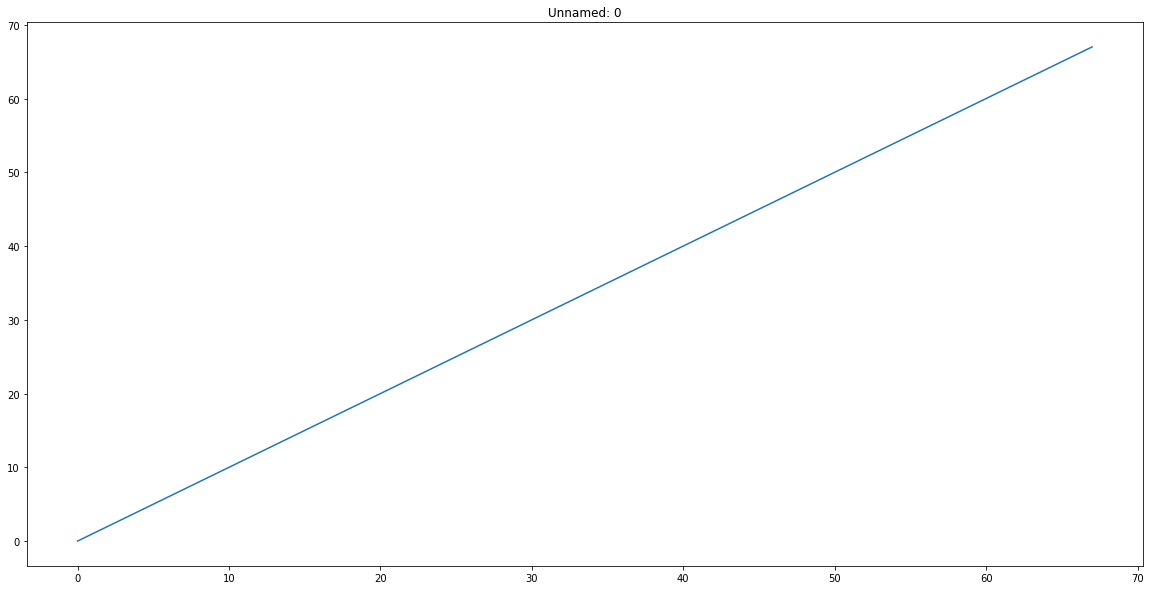

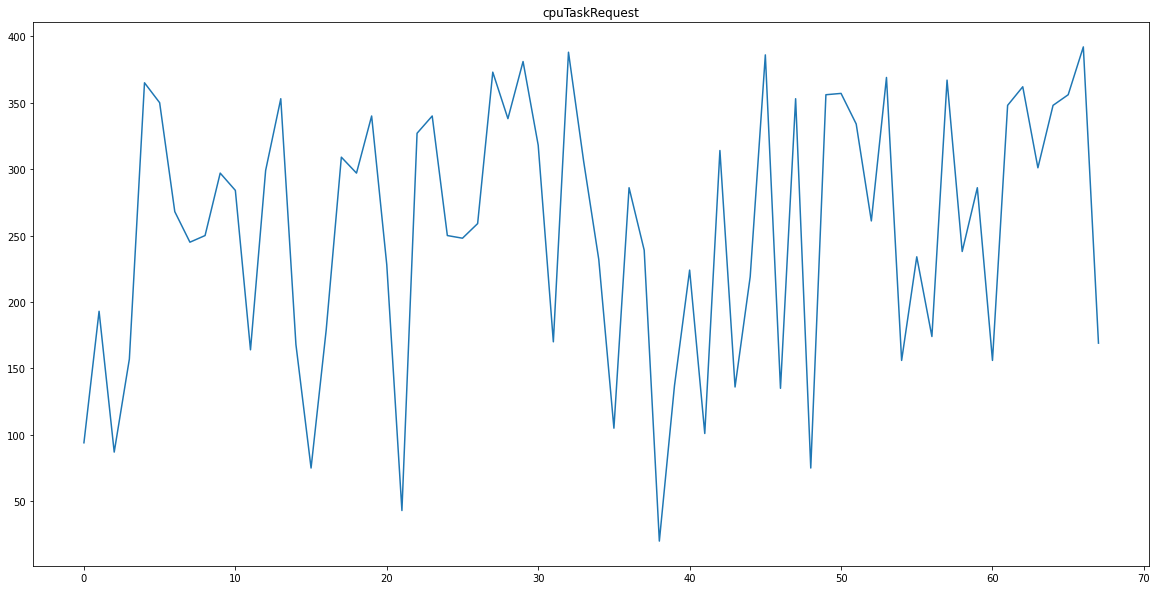

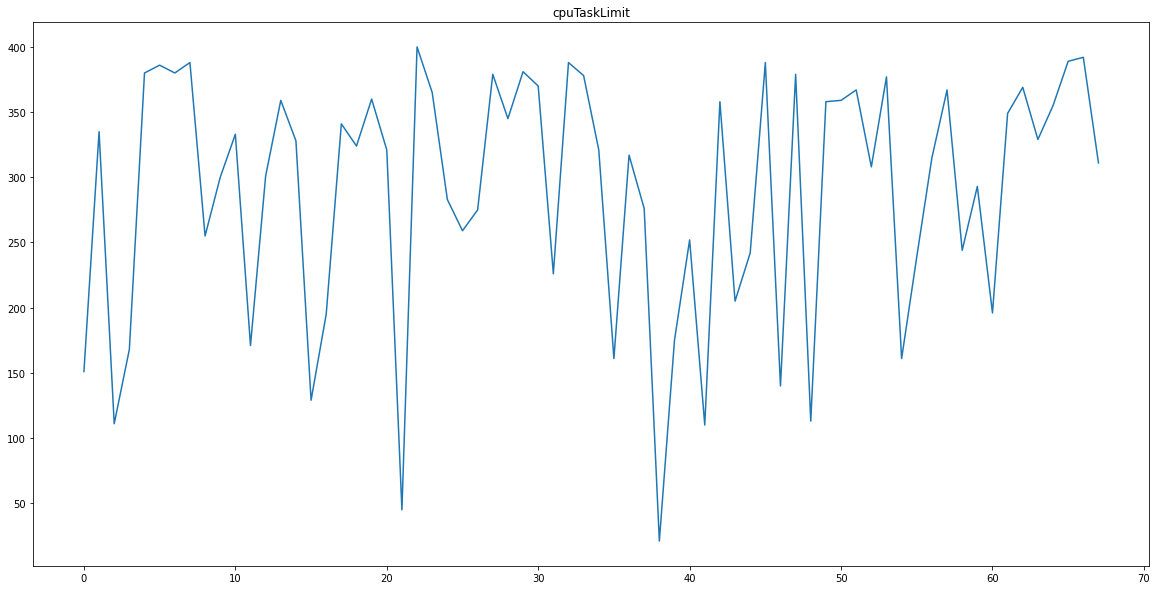

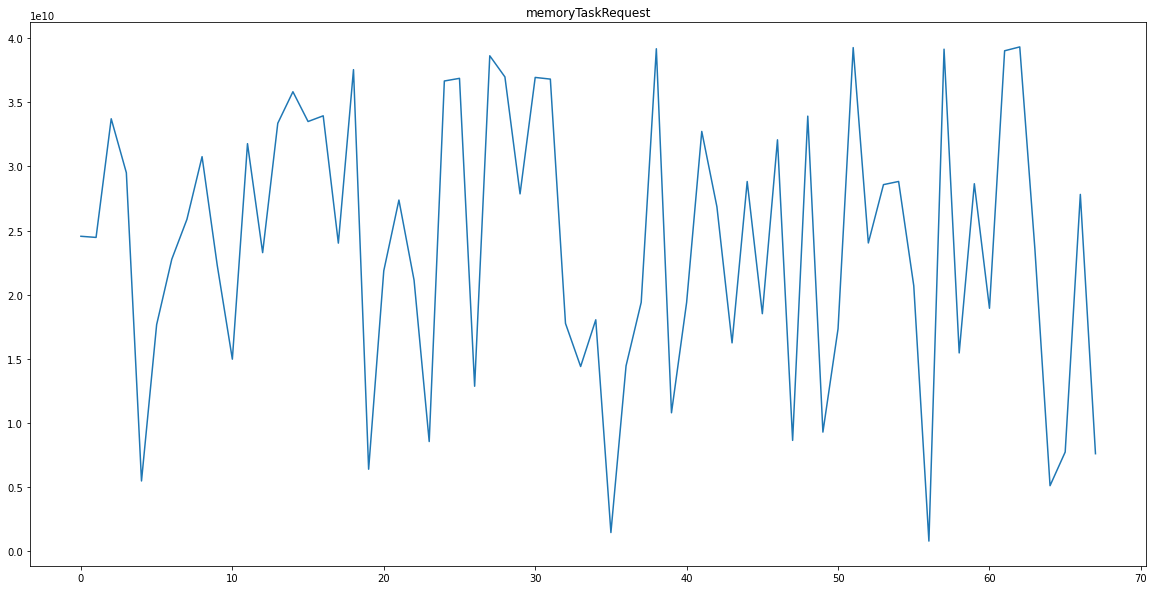

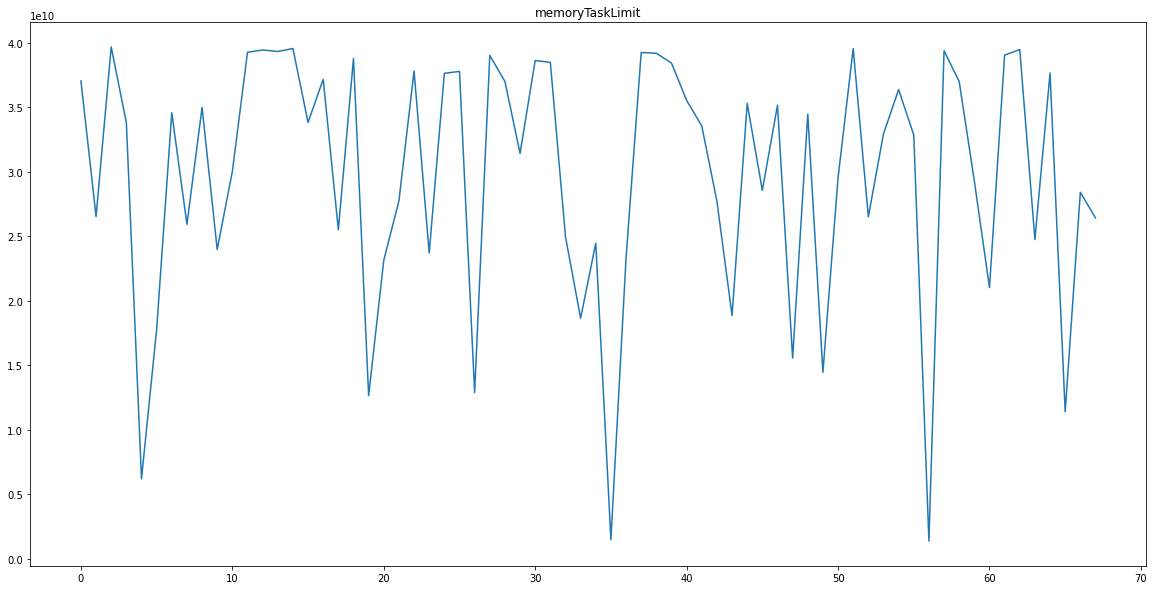

In [5]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
path = os.path.join(os.getcwd(), 'data', 'taskdata_1.json',)
#figure(figsize=(8, 6), dpi=300)
def plot_and_save_columns_data(df, path):
    for col in df.columns:
        try:
            #print(col)
            df[col].plot(figsize=(20, 10),title=col)


            plt.savefig(os.path.join(path, col+'.jpg'))
            plt.show()
        except:
            continue
            
plot_and_save_columns_data(df, path)            

In [6]:
from glob import glob
original_path = os.path.join(os.getcwd(), 'trace_data_original')
print('original_path : ', original_path)
original_files = glob(os.path.join(original_path, '*.csv'))

print(original_files)

original_path :  C:\Users\ps1109\Desktop\Projects\KaiS\testing_the_data\testcluster_data\trace_data_original
['C:\\Users\\ps1109\\Desktop\\Projects\\KaiS\\testing_the_data\\testcluster_data\\trace_data_original\\Task_1.csv', 'C:\\Users\\ps1109\\Desktop\\Projects\\KaiS\\testing_the_data\\testcluster_data\\trace_data_original\\Task_2.csv']


In [7]:
for file in original_files:
    df = pd.read_csv(file)
    print(df.head())

     M3   1  j_1661  1.1  Terminated  86207  86210  50   0.2
0    M1   1  j_1661    1  Terminated  86207  86210  50  0.20
1  R4_3   1  j_1661    1  Terminated  86207  86212  50  0.20
2  M5_4  17  j_1661    1  Terminated  86207  86300  50  0.39
3    M2  40  j_1661    1  Terminated  86207  86485  50  0.39
4  R6_5   1  j_1661    1  Terminated  86207  86617  50  0.30
                                              R19_20   21  j_4142  1  \
0                                             R18_20   21  j_4142  1   
1                                             R21_20   21  j_4142  1   
2  J30_4_5_6_8_9_10_12_13_14_16_17_18_19_21_22_24...   81  j_4142  1   
3                                                 M1    1  j_2436  1   
4                                               R9_8  556  j_8334  1   

   Terminated  389738  389764  100  0.49  Unnamed: 9  
0  Terminated  389738  389764  100  0.49         NaN  
1  Terminated  389738  389764  100  0.49         NaN  
2  Terminated  389738  389765  100  

In [8]:
import sys
directory_above = '../../Env'
sys.path.append(directory_above)

files_in_path = glob(os.path.join(directory_above, '*'))
print(files_in_path)

['../../Env\\env_run.py', '../../Env\\env_run_tensorflow.py', '../../Env\\platform.py', '../../Env\\__pycache__']


5
   new_type_list  new_start_time  new_end_time  new_cpu_list  new_mem_list
0              0               0             3           0.5          0.20
1              0               0             3           0.5          0.20
2              0               0             5           0.5          0.20
3              0               0            93           0.5          0.39
4              0               0           272           0.5          0.39
new_dir_path :  C:\Users\ps1109\Desktop\Projects\KaiS\testing_the_data\testcluster_data\trace_data_original\Task_1


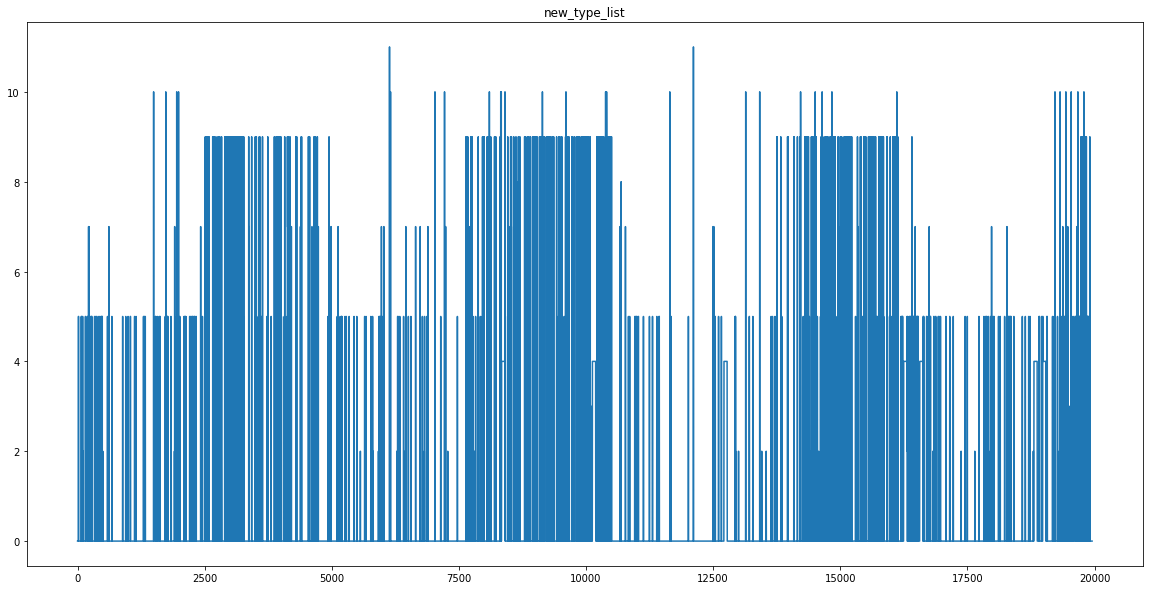

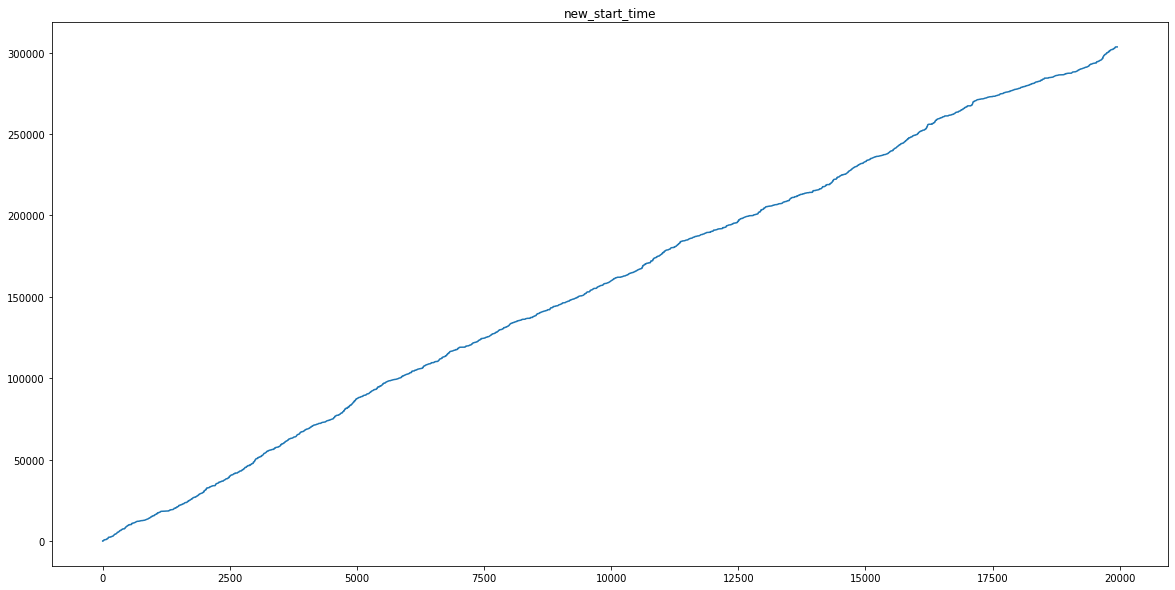

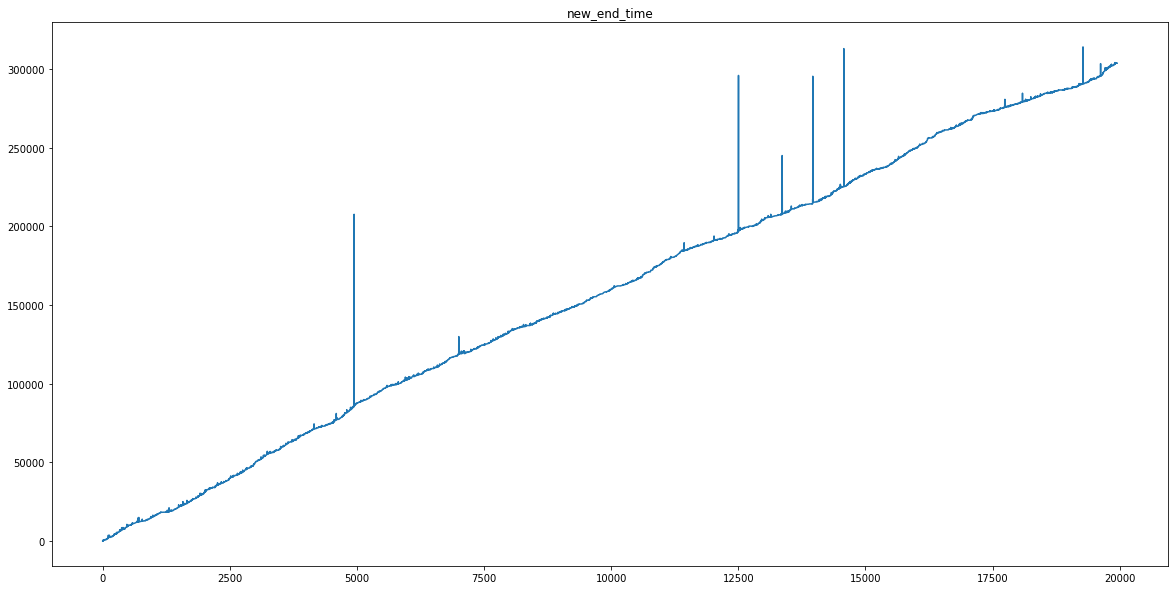

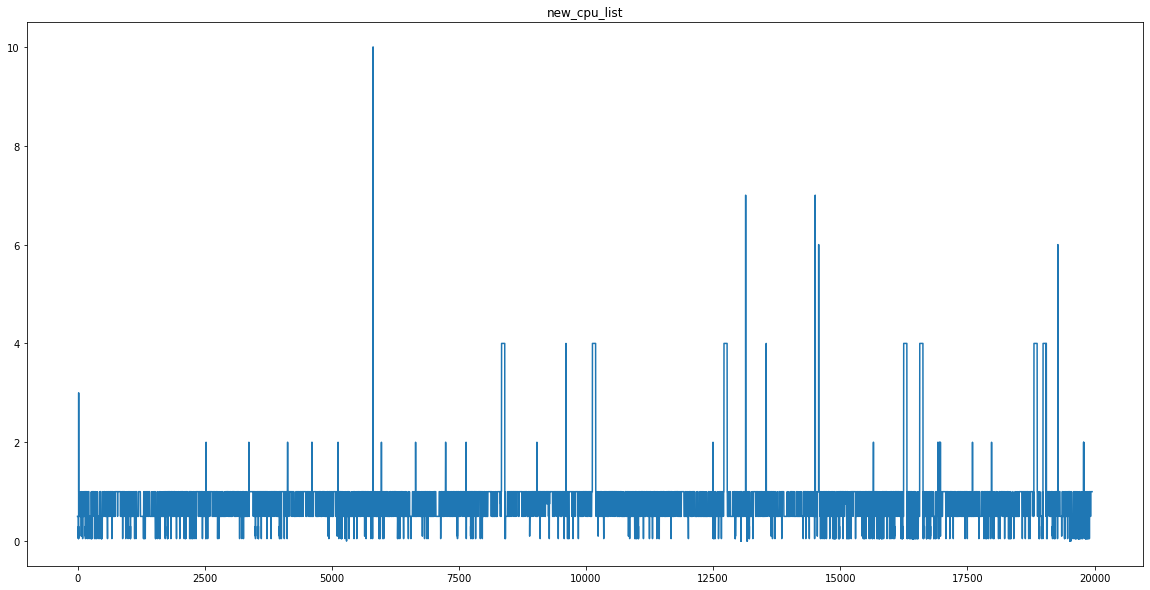

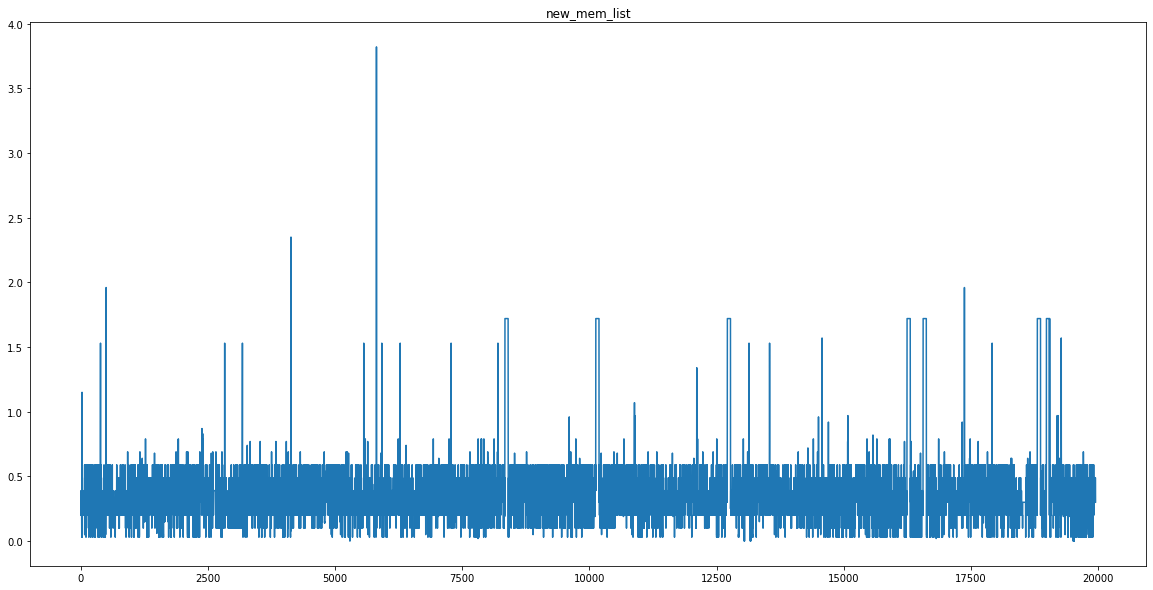

5
   new_type_list  new_start_time  new_end_time  new_cpu_list  new_mem_list
0              0               0            26           1.0          0.49
1              0               0            26           1.0          0.49
2              0               0            26           1.0          0.49
3              0               0            27           1.0          0.49
4              0              12            16           0.5          0.30
new_dir_path :  C:\Users\ps1109\Desktop\Projects\KaiS\testing_the_data\testcluster_data\trace_data_original\Task_2


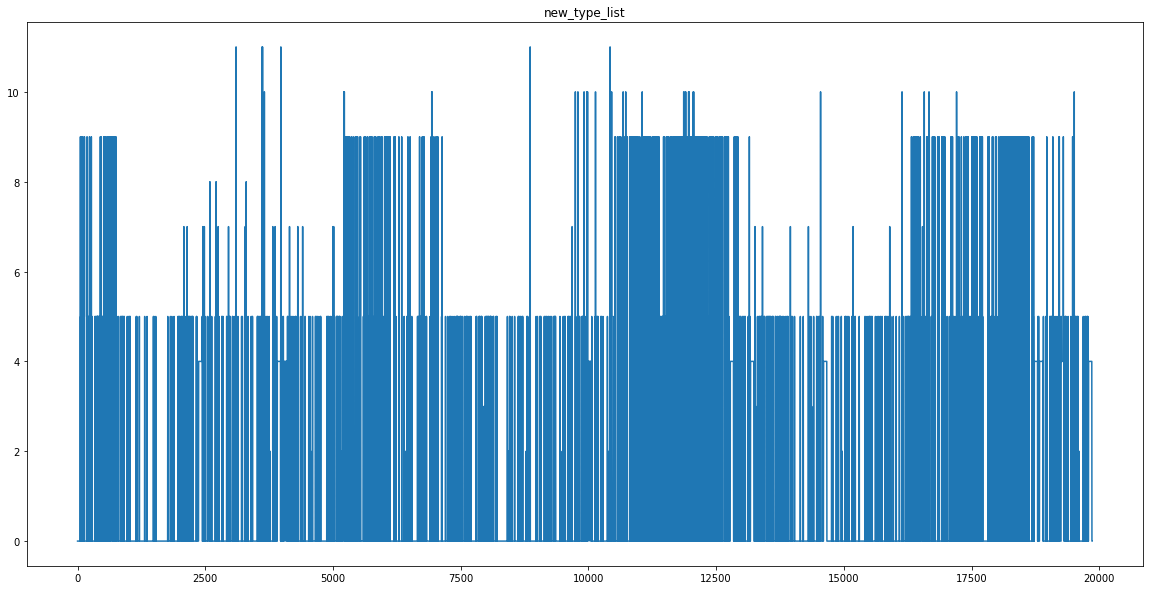

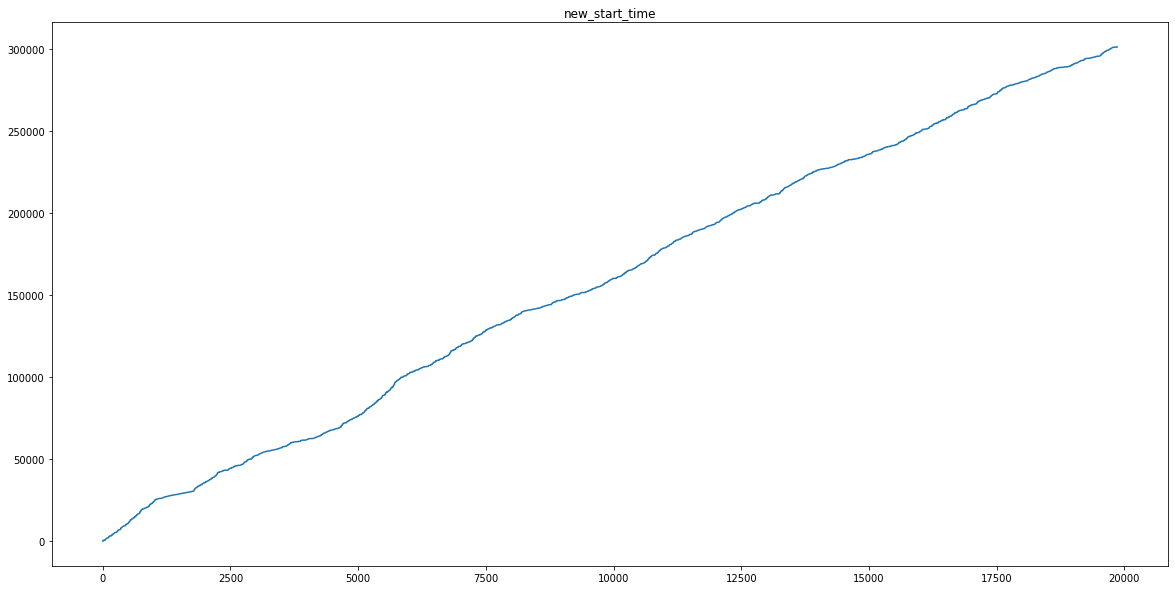

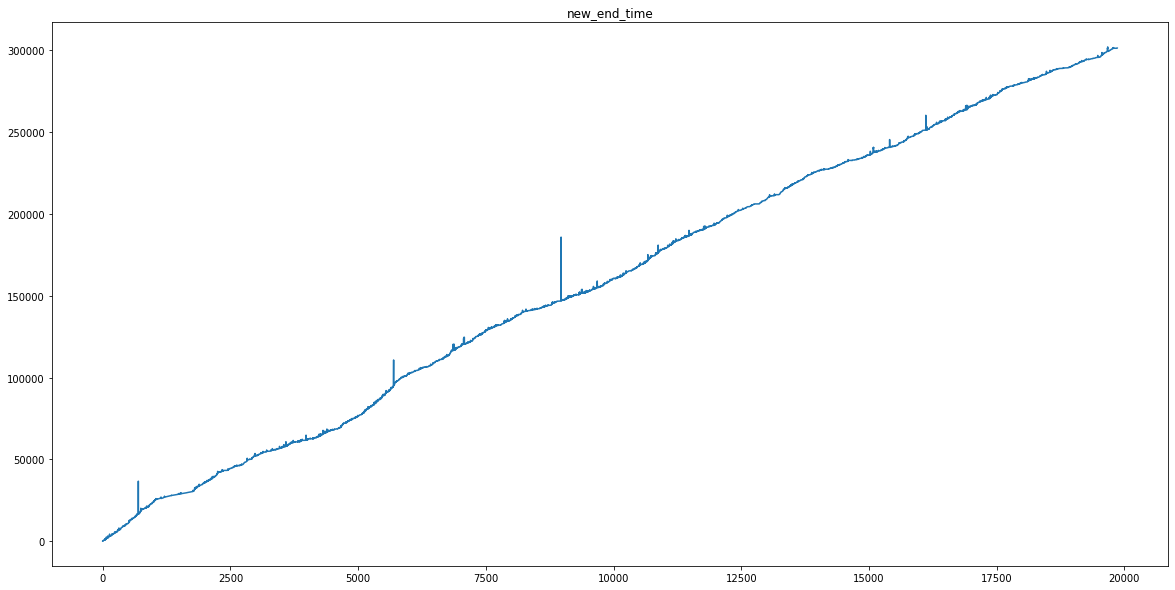

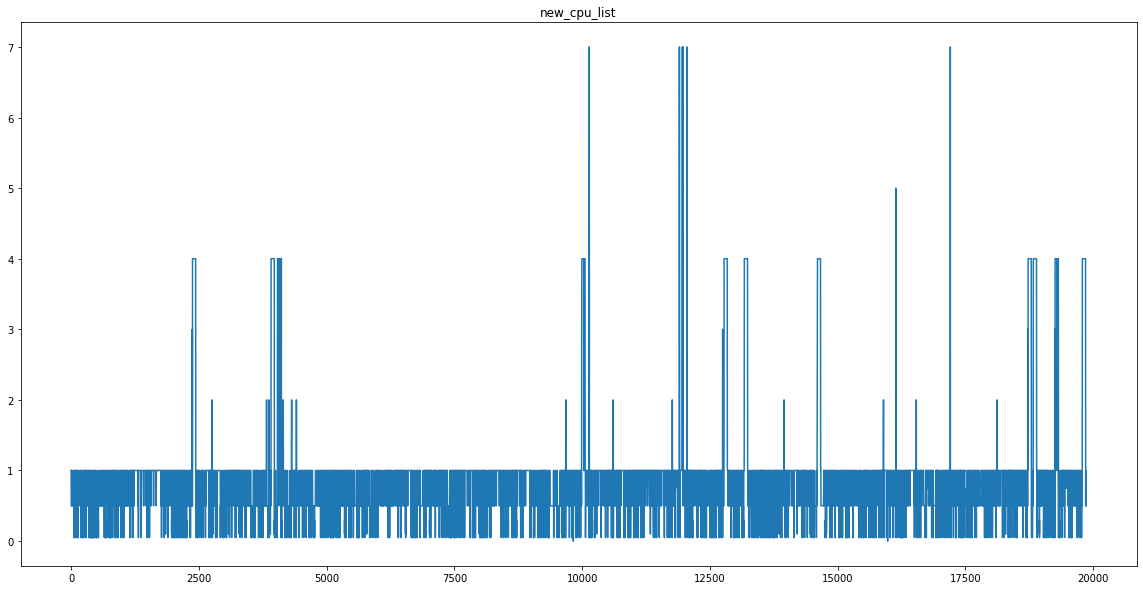

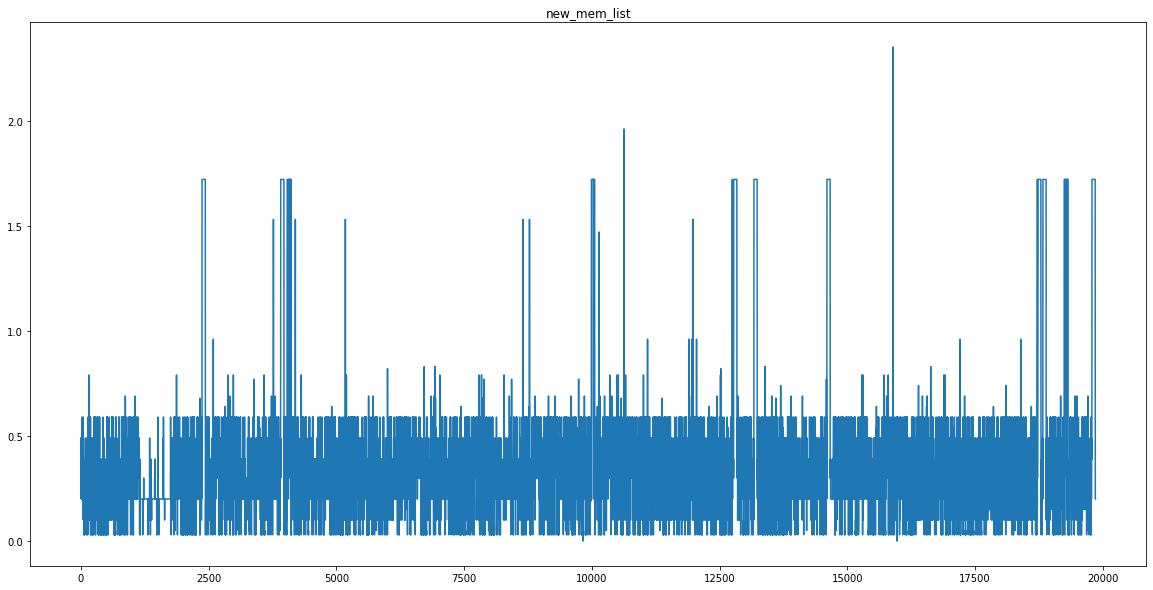

In [21]:
from env_run import get_all_task
columns = ['new_type_list', 'new_start_time', 'new_end_time', 'new_cpu_list', 'new_mem_list']

for file in original_files:
    all_task, _ = get_all_task(file)
    print(len(all_task))
    get_data_diction = {columns[i]:all_task[i] for i in range(len(columns))}
    df = pd.DataFrame(get_data_diction)
    print(df.head())
    basename = os.path.splitext(os.path.basename(file))[0]    
    new_dir_path = os.path.join(original_path, basename)
    print('new_dir_path : ', new_dir_path)
    
    if not os.path.exists(new_dir_path):
        os.makedirs(new_dir_path)
    #print('os.path.splitext(base)[0] : ', os.path.splitext(basename)[0])
    plot_and_save_columns_data(df, new_dir_path)   
    